# Title: 10-Bit 100-MS/s Current-Steering DAC using IEEE SSCS Open-Source Tools


```
SSCS TC-OSE Team, February 2023
SPDX-License-Identifier: Apache-2.0
```


|Name|Email|Affiliation|IEEE Member|SSCS Member|
|:--:|:--:|:----------:|:----------:|:----------:|
|Junbeom Park|decem21@snu.ac.kr|Seoul National University|No|No|

**_Abstract_** - A 10-bit, 100MS/s digital-to-analog converter(DAC) is designed in GF180MCU PDK, where a segmented current-steering technique is employed. A "6M+4L" segmented architecture is used to obtain a balance between area cost and performance.

**_Key words_** - DAC, Current-Steering, Segmented architecture


## Tool Installation

To design this DAC, the next tools are needed.
- xschem : schematic editor
- ngspice : SPICE analog and mixed-signal simulator

Instead of installing each tool, it is recommended to use IC-OSIC-TOOLS is an all-in-one Docker container.
Below is more detailed contents about Docker container


**_see this [github](https://github.com/iic-jku/iic-osic-tools)_**

## I. Introduction

Current-Steering DACs have many advantages such as small size, high speed, and easy compatibility with digital CMOS process, among other types of DACs. This DAC adopts a "6M+4L" semented current-steering topology, in which termometer bits for the 6 MSBs and binary bits for the 4 LSBs are emplyed to obtain a balance between the are and the performance.

## II. Implementation Details of your Idea

This is the block diagram of "6M+4L" current-steering DAC.

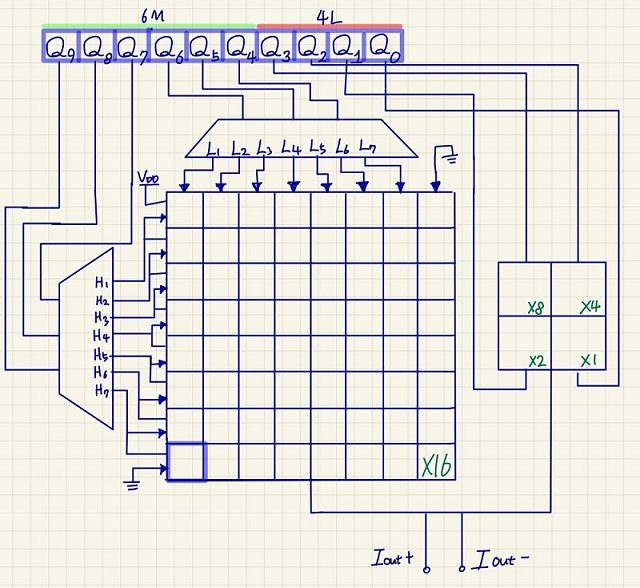


Each block will be explained in order of design flow.


###1. current source + switch

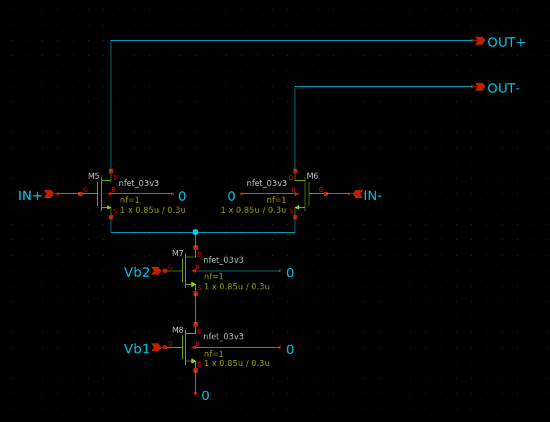

Since the ideal current source should have an infinite output impedance, the cacode transistors are used to increase the output impedance. The output current, which typically is set by the DAC specification, is approximately given by the drain current of transistor at the bottom in the saturation region

$$
I_D=\frac{1}{2} \mu_n C_{ox} W_L\left(V_{G S}-V_{th}\right)^2 \cdot\left(1+\lambda V_{D S}\right)
$$

To increase drain current without any changing of parameters, W(width) will be 2x, 4x, 8x and 16x longer than unit width. In this DAC, there are two main blocks: Currrenet matrix cell for "6M" and binary current cell for "4L". In binary current cell, 1x, 2x, 4x, 8x current sources are used to increase current through output node. On the other hand, in current matrix cell, 16x current source is used becaused it will turn on at the first time after all sources in binary current cell will turn on.

### 2. array selection logic of current matrix cell

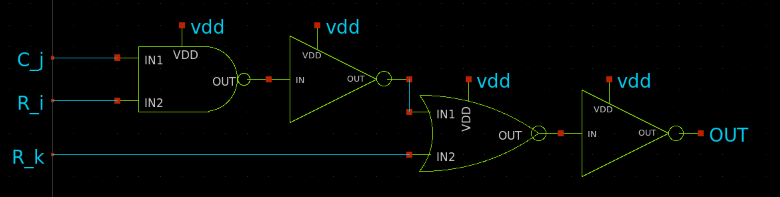

this is the block diagram of selection logic block. the boolean eqauation of this logic is as below,

$$
\text { OUT }=\left[C_j \cap R_i\right] \cup R_{i+1}
$$

### 3. D-latch

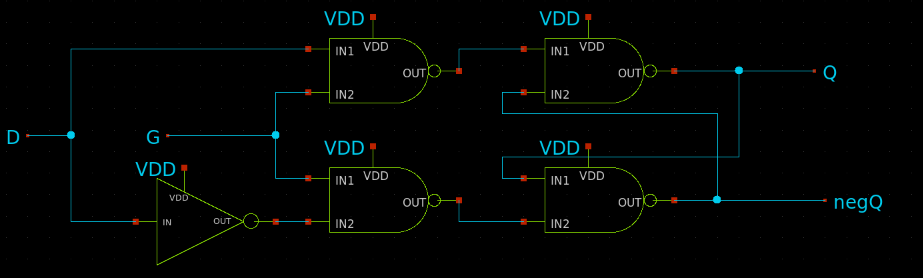

this is the block diagram of D-latch for synchronizing each decoded datas.

### 4. arrray cell of current matrix for "6M"
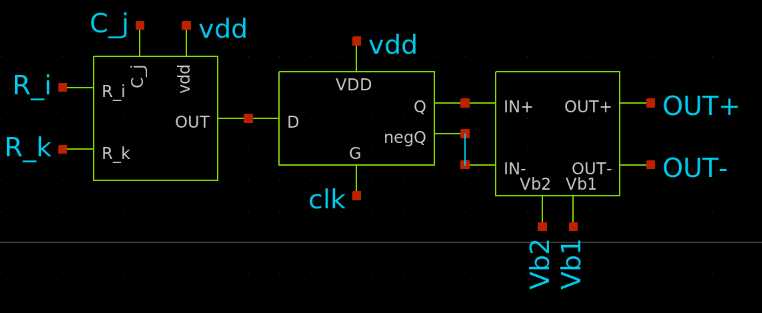

Combining above three blocks, an array cell can be implemented. This block corresponds to one cell(square in blue highlight) and it makes x16 drain current.

### 5. 3to7 Binary-to-Thermometer Decoder

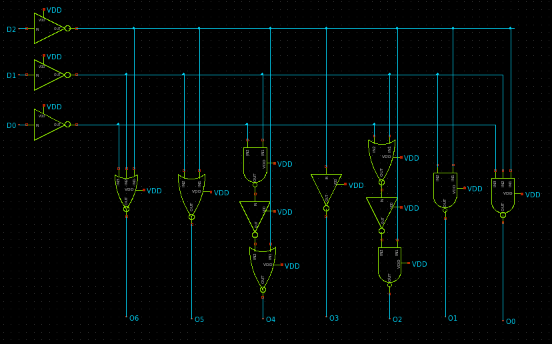

This is the block diagram of binary-to-thermometer decoder. cf) the truth table of decoder is as below.

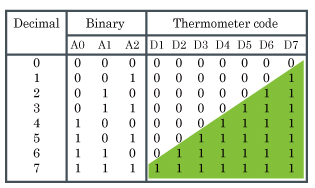

### 6. Output Result

Prior to the explanation, I apologize for not proceeding with the qualitative measurement.

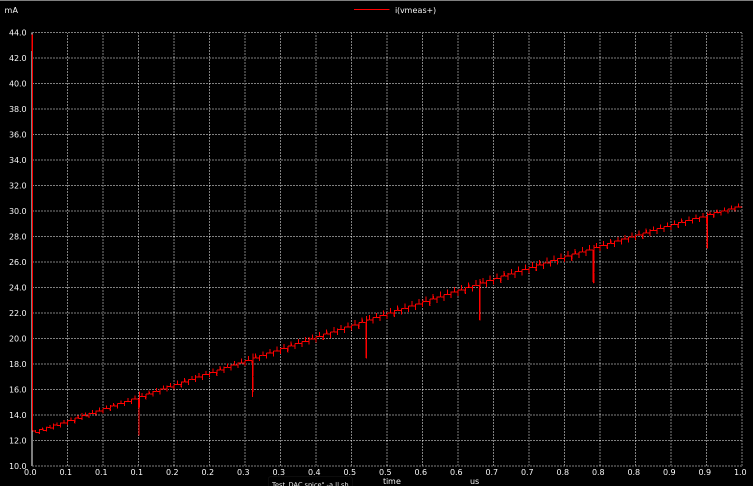

This is the output graph of DAC.


## III. Summary of your Idea

To sum up, this DAC can be implemented with several digital blocks and analog current cell. And there are some isssues on the linearity, glitch performace, etc.

## IV. Planification and Tasks

To make more sophisticated DAC, the quantative measurement must be added. Plus, the custom latch for high speed will be designed.

Thank for reading my post :)